Intercepto (Rigde 1): 219251.8547047691
Coeficientes de regresión (Rigde 1): [-52925.7575442  -53744.69781116  13319.85812079 -10293.66412867
  29937.78985234 -44479.43818497  29692.21439608  73624.96037269
 -39789.8719159  130031.63921427  -3697.62935336   4750.43033774]
Intercepto (Rigde 1e4): 213248.32449961078
Coeficientes de regresión (Rigde 1e4): [ -9760.89761151 -12228.34267466  11199.36514172   5640.33695302
   4851.91951441  -9762.34854409   5734.63871066  50971.33381983
 -24316.41748776     89.44198348   5253.33235919   5765.58163202]
Intercepto: 219237.00064331217
Coeficientes de regresión: [-52952.95152846 -53767.62485624  13312.88334575 -10320.06092603
  29920.76507621 -44490.47744263  29746.22226671  73636.15586366
 -39766.3987444  156065.71982235  -3697.40166109   4758.75361226]


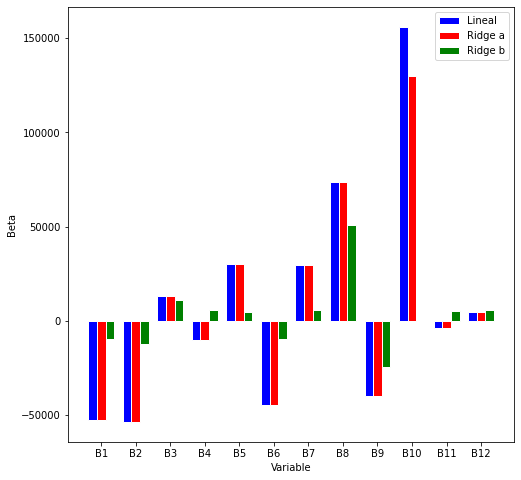

In [ ]:
#!/usr/local/bin/python
# coding: latin-1
import os, sys
#EJERCICIO 1
# cargar librerias-----------------------------------------------
import pandas as pd
import os
import tarfile
import urllib.request
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
# definir las rutas y caminos donde se encuentran los datos------
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# path que se va a crear en nuestro sistema----------------------
HOUSING_PATH = os.path.join("datasets", "housing")
# lugar de descarga del dataset----------------------------------
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# definir una funcion que obtenga los datos y los descargue-----
def fetch_housing_data(housing_url=HOUSING_URL, 
housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()
# definir una funcion que cargue el csv en un dataframe----------
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
# separar variable respuesta del dataset-------------------------
respuesta = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)
# definir var numerica-------------------------------------------
housing_num = housing.drop("ocean_proximity", axis=1)
# importar el "imputador"----------------------------------------
from sklearn.impute import SimpleImputer
# importar el "estandarizador"-----------------------------------
from sklearn.preprocessing import StandardScaler
# importar la clase pipeline"------------------------------------
from sklearn.pipeline import Pipeline
# definir el pipeline--------------------------------------------
num_pipeline = Pipeline([
        ("imputador", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])
# aplicar el pipeline--------------------------------------------
housing_num_tr = num_pipeline.fit_transform(housing_num)
# importar clases------------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# separar dataset en variables numericas y variable categorica---
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
# definir full pipeline------------------------------------------
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop = "first"), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)
# importar clase-------------------------------------------------
from sklearn.linear_model import Ridge
# ajustar el modelo----------------------------------------------
ridge_reg = Ridge(alpha = 1, solver = "auto")
ridge_reg.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
print('Intercepto (Rigde 1):', ridge_reg.intercept_)
# coeficientes de regresion
print('Coeficientes de regresión (Rigde 1):', ridge_reg.coef_)
# importar clase-------------------------------------------------
from sklearn.linear_model import Ridge
# ajustar el modelo----------------------------------------------
ridge_reg_b = Ridge(alpha = 1e4, solver = "auto")
ridge_reg_b.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
print('Intercepto (Rigde 1e4):', ridge_reg_b.intercept_)
# coeficientes de regresion
print('Coeficientes de regresión (Rigde 1e4):', ridge_reg_b.coef_)
# importar clase-------------------------------------------------
from sklearn.linear_model import LinearRegression
# ajustar el modelo----------------------------------------------
lm1 = LinearRegression()
lm1.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
print('Intercepto:',lm1.intercept_)
# coeficientes de regresion
print('Coeficientes de regresión:', lm1.coef_)
fig = plt.figure(figsize=(8, 8))
# ancho de barra-------------------------------------------------
barWidth = 0.25
# definir posicion barras series---------------------------------
r1 = np.arange(len(lm1.coef_))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# pintar las barras----------------------------------------------
plt.bar(r1, lm1.coef_, color = "blue", 
width = barWidth, edgecolor = "white", label = "Lineal");
plt.bar(r2, ridge_reg.coef_, color = "red", 
width = barWidth, edgecolor = "white", label = "Ridge a");
plt.bar(r3, ridge_reg_b.coef_, color = "green", 
width = barWidth, edgecolor = "white", label = "Ridge b");
plt.xticks([r + barWidth for r in range(len(lm1.coef_))], 
['B1', 'B2', 'B3', 'B4', 
 'B5', 'B6', 'B7', 'B8', 
 'B9', 'B10', 'B11', 'B12']);
plt.legend();
plt.xlabel("Variable");
plt.ylabel("Beta");
plt.show(fig)

219239.37161140097
[-52936.10528879 -53753.78630134  13312.79044653 -10299.69365603
  29909.69564186 -44483.79617817  29730.65349082  73630.76579416
 -39774.84408823 151938.98956871  -3679.84442713   4753.79358651]
218717.12395482304
[    -0.             -0.           5925.06123247      0.
      0.             -0.              0.          65973.15122729
 -37370.99334873      0.              0.              0.        ]


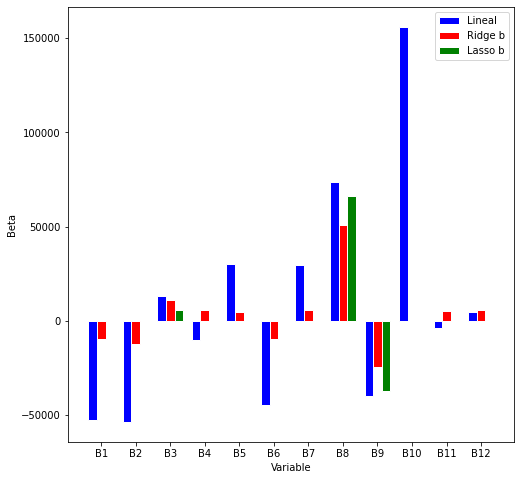

In [ ]:
# EJERCICIO 2
# importar clase-------------------------------------------------
from sklearn.linear_model import Lasso
# ajustar el modelo----------------------------------------------
lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
print(lasso_reg.intercept_)
# coeficientes de regresion
print(lasso_reg.coef_)
# importar clase-------------------------------------------------
from sklearn.linear_model import Lasso
# ajustar el modelo----------------------------------------------
lasso_reg_b = Lasso(alpha = 1e4)
lasso_reg_b.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
print(lasso_reg_b.intercept_)
# coeficientes de regresion
print(lasso_reg_b.coef_)
fig = plt.figure(figsize=(8, 8))
# ancho de barra-------------------------------------------------
barWidth = 0.25
# definir posicion barras series---------------------------------
r1 = np.arange(len(lm1.coef_))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# pintar las barras----------------------------------------------
plt.bar(r1, lm1.coef_, color = "blue", 
width = barWidth, edgecolor = "white", label = "Lineal");
plt.bar(r2, ridge_reg_b.coef_, color = "red", 
width = barWidth, edgecolor = "white", label = "Ridge b");
plt.bar(r3, lasso_reg_b.coef_, color = "green", 
width = barWidth, edgecolor = "white", label = "Lasso b");
plt.xticks([r + barWidth for r in range(len(lm1.coef_))], 
['B1', 'B2', 'B3', 'B4', 
 'B5', 'B6', 'B7', 'B8', 
 'B9', 'B10', 'B11', 'B12']);
plt.legend();
plt.xlabel("Variable");
plt.ylabel("Beta");
plt.show()

206865.4749645959
[ -7.3285382  -23.12318484  16.94967114  21.48093501   7.83412633
  -3.90892666  10.4757704  110.83304095 -36.29600822   0.
   8.01288948   7.55581778]
208267.51670197048
[-1469.95946607 -3059.90966939  2747.34800787  2439.66788593
   801.03210661 -1171.1003709   1151.60483666 15113.62768328
 -5336.05497542     0.          1215.79217006  1141.77891116]


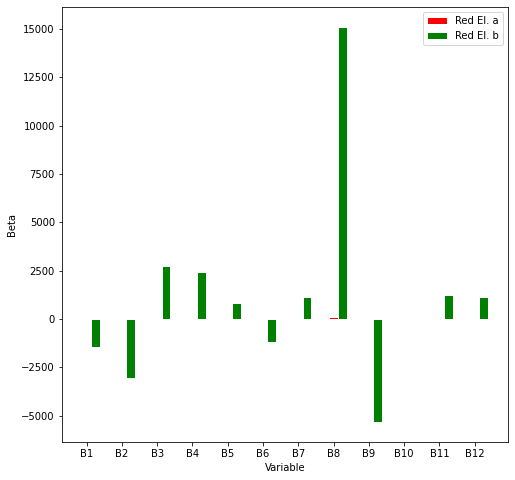

[-1469.95946607 -3059.90966939  2747.34800787  2439.66788593
   801.03210661 -1171.1003709   1151.60483666 15113.62768328
 -5336.05497542     0.          1215.79217006  1141.77891116]
0.95


array([[1.38049962e+10, 1.38049952e+10, 1.38049938e+10, 1.38049923e+10,
        1.38049907e+10, 1.38049890e+10, 1.38049872e+10, 1.38049852e+10,
        1.38049831e+10, 1.38049808e+10, 1.38049784e+10, 1.38049758e+10,
        1.38049730e+10, 1.38049700e+10, 1.38049668e+10, 1.38049634e+10,
        1.38049596e+10, 1.38049556e+10, 1.38049511e+10, 1.38049461e+10,
        1.38049409e+10, 1.38049353e+10, 1.38049293e+10, 1.38049228e+10,
        1.38049158e+10, 1.38049081e+10, 1.38048997e+10, 1.38048906e+10,
        1.38048807e+10, 1.38048702e+10, 1.38048589e+10, 1.38048467e+10,
        1.38048336e+10, 1.38048195e+10, 1.38048046e+10, 1.38047885e+10,
        1.38047712e+10, 1.38047527e+10, 1.38047330e+10, 1.38047117e+10,
        1.38046889e+10, 1.38046644e+10, 1.38046382e+10, 1.38046100e+10,
        1.38045798e+10, 1.38045473e+10, 1.38045125e+10, 1.38044751e+10,
        1.38044351e+10, 1.38043921e+10, 1.38043460e+10, 1.38042965e+10,
        1.38042435e+10, 1.38041865e+10, 1.38041255e+10, 1.380406

In [ ]:
# EJERCICIO 3
# semilla para que los resultados sean los mismos----------------
np.random.seed(3)
# importar clase-------------------------------------------------
from sklearn.linear_model import ElasticNetCV
# ajustar el modelo----------------------------------------------
e_net = ElasticNetCV(cv = 10, l1_ratio = 0.1)
e_net.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
print(e_net.intercept_)
# coeficientes de regresion
print(e_net.coef_)
# semilla para que los resultados sean los mismos----------------
np.random.seed(3)
# importar clase-------------------------------------------------
from sklearn.linear_model import ElasticNetCV
# ajustar el modelo----------------------------------------------
e_net_b = ElasticNetCV(cv = 10, l1_ratio = 0.95)
e_net_b.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
print(e_net_b.intercept_)
# coeficientes de regresion
print(e_net_b.coef_)
fig = plt.figure(figsize=(8, 8))
# ancho de barra-------------------------------------------------
barWidth = 0.25
# definir posicion barras series---------------------------------
r1 = np.arange(len(e_net.coef_))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# pintar las barras----------------------------------------------
plt.bar(r2, e_net.coef_, color = "red", 
width = barWidth, edgecolor = "white", label = "Red El. a");
plt.bar(r3, e_net_b.coef_, color = "green", 
width = barWidth, edgecolor = "white", label = "Red El. b");
plt.xticks([r + barWidth for r in range(len(lm1.coef_))], 
['B1', 'B2', 'B3', 'B4', 
 'B5', 'B6', 'B7', 'B8', 
 'B9', 'B10', 'B11', 'B12']);
plt.legend();
plt.xlabel("Variable");
plt.ylabel("Beta");
plt.show()
# semilla para que los resultados sean los mismos----------------
np.random.seed(3)
# importar clase-------------------------------------------------
from sklearn.linear_model import ElasticNetCV
# ajustar el modelo----------------------------------------------
e_net_c = ElasticNetCV(cv = 10, l1_ratio = [0.1, 0.95])
e_net_c.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
# print(e_net_c.intercept_)
# coeficientes de regresion
print(e_net_c.coef_)
print(e_net_c.l1_ratio_)
# se puede comprobar que el error de test es mayor con r = 0.1---
error = e_net_c.mse_path_
np.mean(error, axis = 2)